<a href="https://colab.research.google.com/github/XTMay/python-data-science-course/blob/main/notebooks/Lec_5_6_Data_Cleaning_%26_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Lesson 05_06: 数据清洗 (Data Cleaning) & 数据处理 (Manipulation)

## 📘 简介

在数据科学的世界里，原始数据很少能够直接用于机器学习模型或分析。它通常包含不一致、缺失值、错误，并且需要转换成合适的格式。这就是数据清洗和处理发挥作用的地方。

* **数据清洗：**识别和纠正数据中的错误或不一致的过程。这包括处理缺失值、重复项以及标准化格式。
* **数据处理：**转换和重构数据以使其更适用于分析或建模的过程。这包括创建新特征、过滤、分组和聚合数据。

这些步骤至关重要，因为数据质量直接影响着你的洞察力和模型性能。“垃圾进，垃圾出”是数据科学中的一句常用格言。

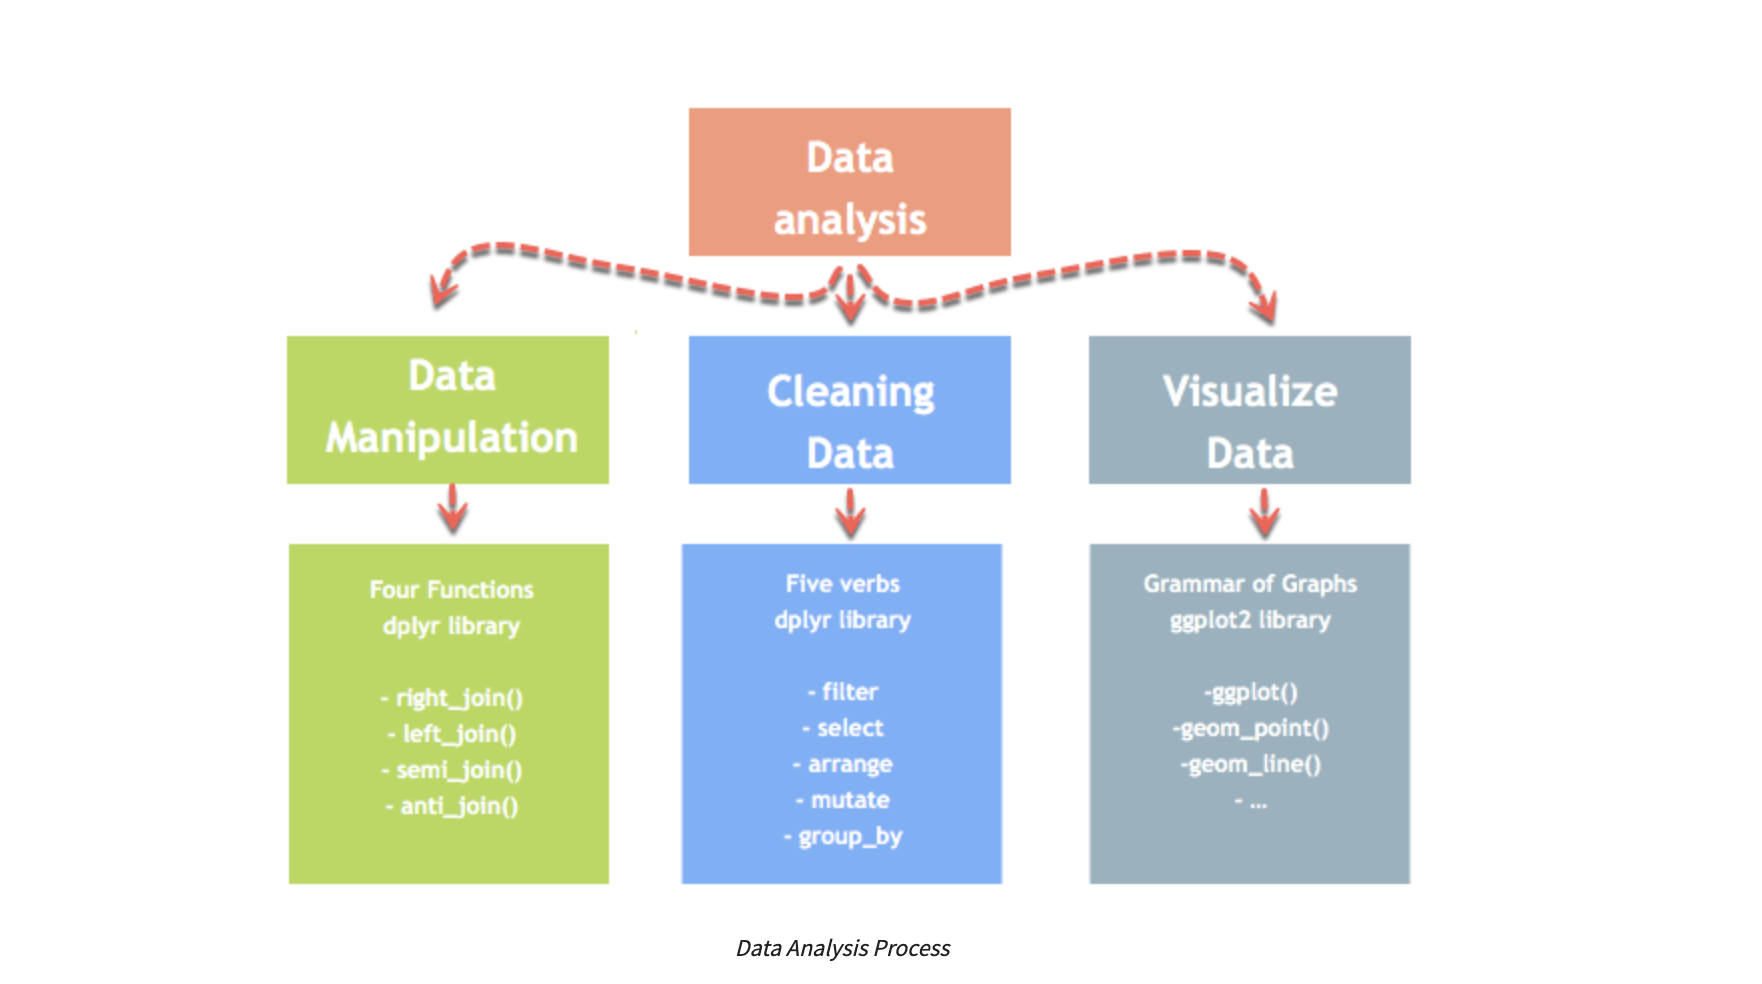

## 数据清洗、空值、异常值
在数据清洗过程中，主要处理的是**缺失值**、**异常值**、**重复值**。

所谓清洗，是对数据集通过**丢弃、填充、替换、去重**等操作。

达到去除异常、纠正错误、补足缺失的目的。

噪音，异常值， Noise, Outlier

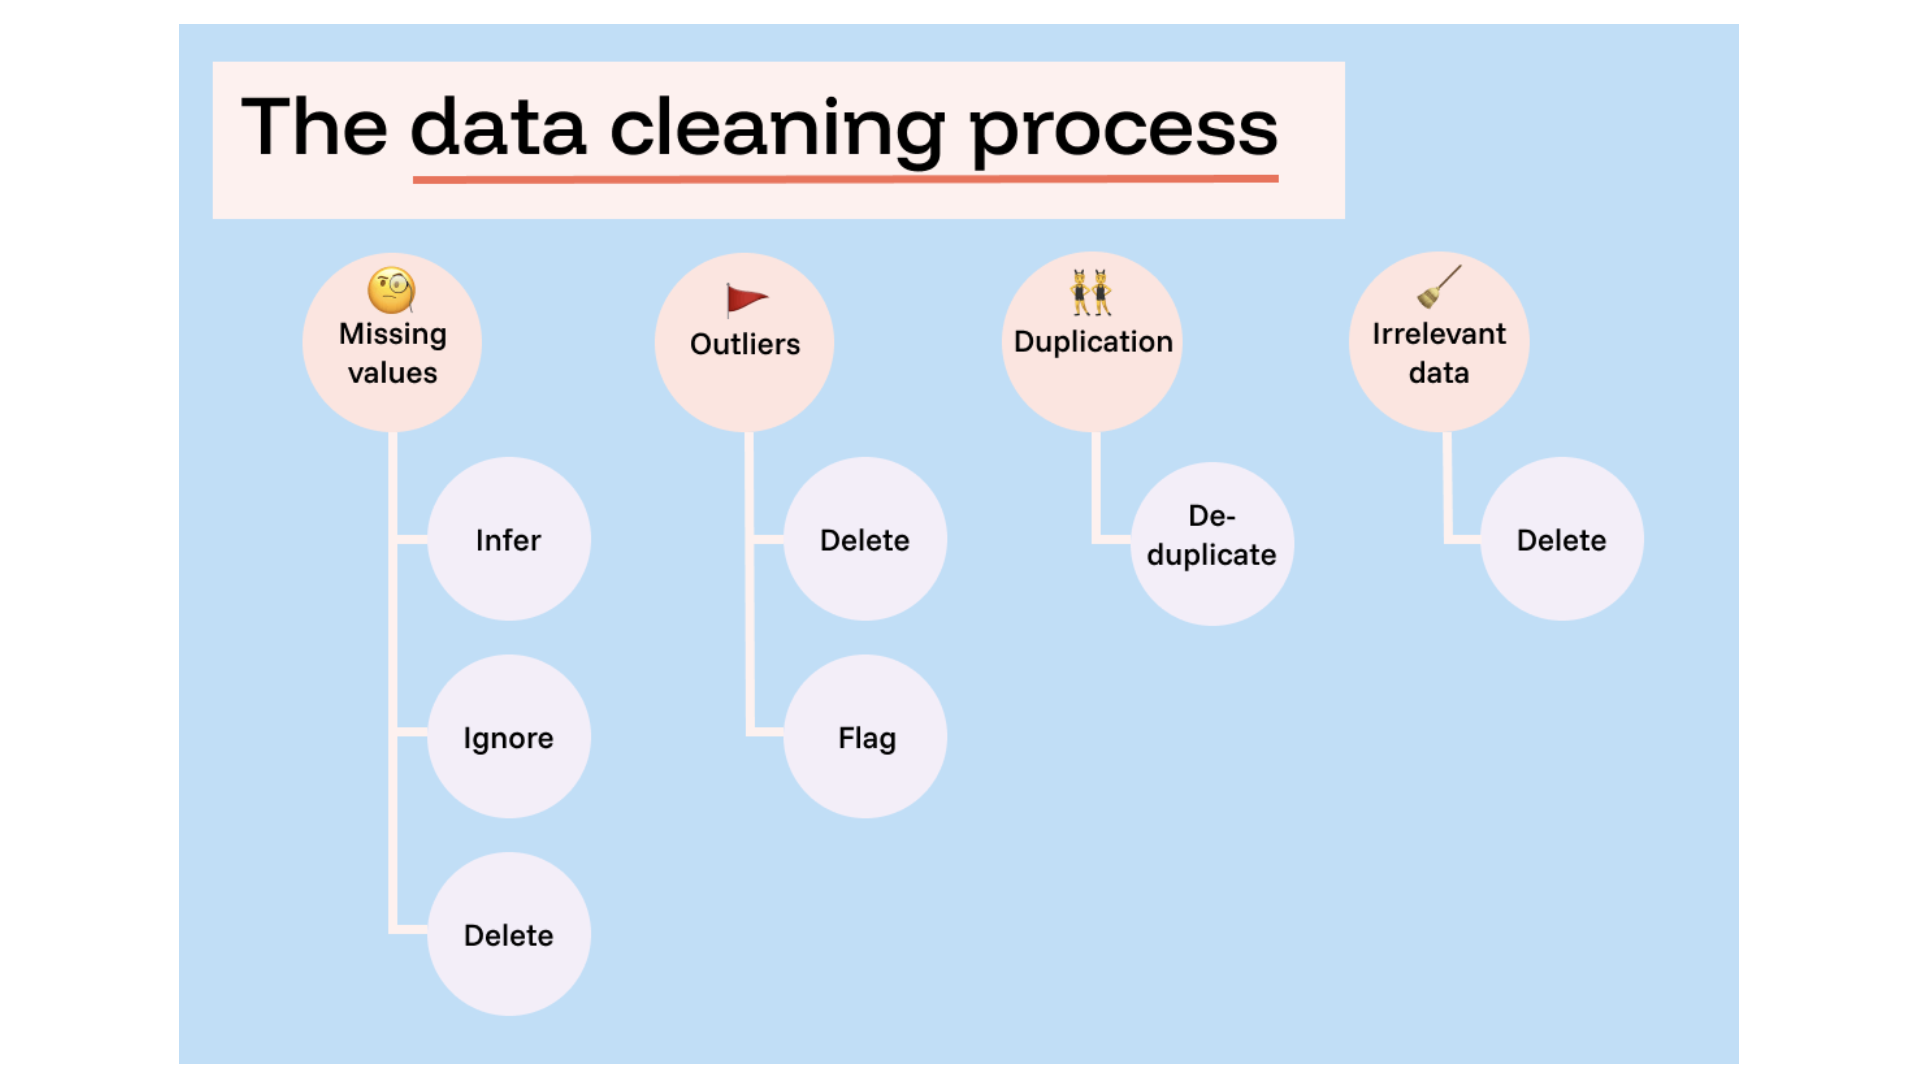

我们将使用著名的泰坦尼克号数据集（这是一个经典的入门数据集）来练习这些技术。

## 📊 加载数据（Loading the Dataset）

In [1]:
import pandas as pd

# Load the dataset from a public URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [2]:
# Display the first few rows to get a glimpse of the data
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🛳 Titanic 数据集简介

> 数据来源：[https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

该数据集记录了泰坦尼克号部分乘客的信息，并用于预测哪些乘客在事故中幸存。是机器学习和数据分析入门中最常用的数据集之一。

---

### 目标变量

- `Survived`：是否幸存  
  - `0` = 否  
  - `1` = 是  

---

### 字段说明（Features）

| 字段名        | 说明                                                  | 类型       |
|---------------|-------------------------------------------------------|------------|
| `PassengerId` | 乘客编号（仅为索引用，无实际含义）                   | 整数       |
| `Survived`    | 是否幸存（0 = 否，1 = 是）                            | 分类变量   |
| `Pclass`      | 客舱等级（1 = 头等舱，2 = 二等舱，3 = 三等舱）       | 分类变量   |
| `Name`        | 姓名                                                  | 字符串     |
| `Sex`         | 性别（male / female）                                 | 分类变量   |
| `Age`         | 年龄（部分缺失）                                      | 数值型     |
| `SibSp`       | 同行的兄弟姐妹或配偶数量                              | 整数       |
| `Parch`       | 同行的父母或子女数量                                  | 整数       |
| `Ticket`      | 船票号码                                              | 字符串     |
| `Fare`        | 船票价格                                              | 数值型     |
| `Cabin`       | 客舱号（缺失较多）                                    | 字符串     |
| `Embarked`    | 登船港口（C = Cherbourg, Q = Queenstown, S = Southampton） | 分类变量 |

---


## 🧹 第一部分：数据清洗 (Data Cleaning)

加载数据后，让我们开始清洗过程。我们将检查数据类型、查找缺失值并解决任何不一致之处。

### 检查数据：`.info()` 和 `.describe()`

`.info()` 提供 DataFrame 的简洁摘要，包括索引 dtype 和列 dtypes、非空值和内存使用情况。
`.describe()` 生成描述性统计数据，总结数据集分布的中心趋势、离散度和形状，不包括 NaN 值。

In [35]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("\nDataFrame Description:")
display(df.describe())


DataFrame Description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print("\nDataFrame Description (including object types):")
display(df.describe(include='all'))


DataFrame Description (including object types):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 检测缺失值

缺失值在真实世界的数据集中很常见。我们可以使用 `.isnull()` 或 `.isna()` 轻松检测它们，然后按列对它们求和。

In [6]:
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### 处理缺失值

有几种处理缺失值的策略：

1. **删除行或列：**如果某列或某行有太多缺失值，最好将其删除。
2. **填充缺失值：**使用统计度量（如均值、中位数、众数或常数值）填充缺失值。

让我们演示这两种方法。我们将删除“Cabin”列（由于缺失值太多），并用中位数填充缺失的“Age”值。

In [7]:
# Drop the 'Cabin' column
df_cleaned = df.drop('Cabin', axis=1)
print("\nDataFrame after dropping 'Cabin' column:")
display(df_cleaned.head())


DataFrame after dropping 'Cabin' column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# Fill missing 'Age' values with the median
median_age = df_cleaned['Age'].median()

In [9]:
median_age

28.0

In [ ]:
df_cleaned['Age'].fillna(median_age, inplace=True)

/tmp/ipython-input-2911775420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(median_age, inplace=True)


- df.describe()： 只描述数值型列
- df.describe(include='object')： 只描述字符串列
- df.describe(include='category')： 只描述类别型列
- df.describe(include='all')： 描述所有列（数值 + 类别 + 字符串）


In [10]:
print("\nMissing values after handling 'Age' and 'Cabin':")
display(df_cleaned.isnull().sum())


Missing values after handling 'Age' and 'Cabin':


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


###  Handling Duplicates（处理重复数据）

在数据分析中，重复的行（Duplicate rows） 会导致分析结果不准确，比如错误的平均值或重复的计数。

In [11]:
print(f"\nNumber of duplicate rows: {df_cleaned.duplicated().sum()}")

# If there were duplicates, we would remove them like this:
# df_cleaned = df_cleaned.drop_duplicates()
# print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


Number of duplicate rows: 0


### 标准化类别变量和处理不一致格式

Standardizing Categorical Values & Resolving Inconsistent Formats

在实际数据中，类别型变量（categorical variables） 经常会有一些格式不一致的问题，比如大小写不同、拼写错误等。

Green, gREEn

In [12]:
# Check unique values in 'Sex'
print("\nUnique values in 'Sex' before standardization:")
print(df_cleaned['Sex'].unique())


Unique values in 'Sex' before standardization:
['male' 'female']


In [13]:
# Example of standardizing if needed (e.g., converting to lowercase)
df_cleaned['Sex'] = df_cleaned['Sex'].str.lower()
print("\nUnique values in 'Sex' after standardization (lowercase):")
print(df_cleaned['Sex'].unique())

# Example of resolving inconsistent formats (if applicable)
# This dataset doesn't have obvious format inconsistencies, but in real data,
# you might need to convert date strings to datetime objects, for example.
# pd.to_datetime(df['DateColumn'], errors='coerce')


Unique values in 'Sex' after standardization (lowercase):
['male' 'female']


## 🧱 第二部分：数据处理

数据处理包括转换和重构数据，以便为分析或建模做好准备。

### 创建新列

我们可以从现有特征创建新特征。让我们创建“FamilySize”（SibSp + Parch + 1）和“FarePerPerson”。

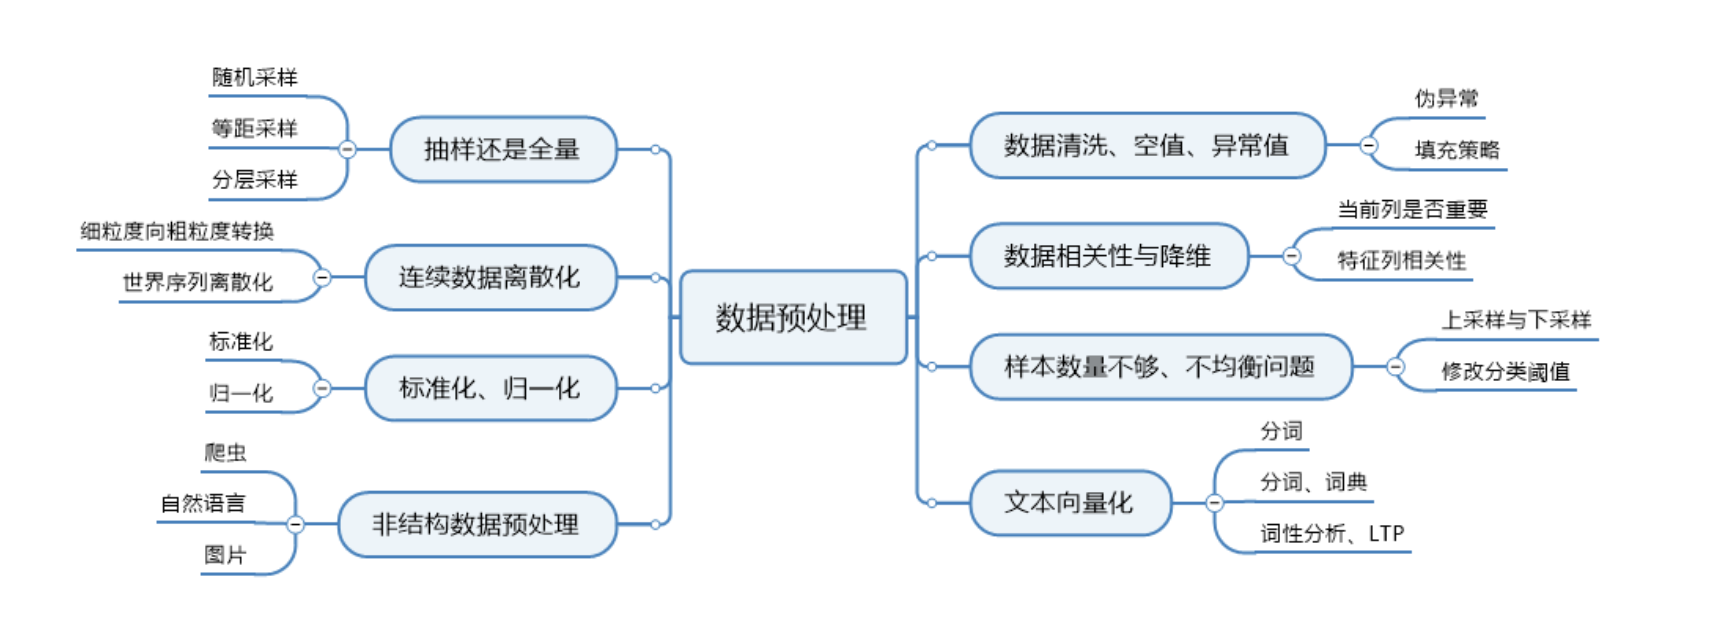

## 抽样还是全量

- 简单随机抽样

In [14]:
import random
import numpy as np

data = np.random.randint(low=1, high=5, size=(5,6))

# 随机抽样
list_len = [i for i in range(len(data))]
list_sample = random.sample(list_len, 3)  #从list_len中随机取出三个数
data_sample = data[list_sample]

In [15]:
data

array([[3, 2, 3, 2, 1, 3],
       [2, 4, 1, 1, 3, 3],
       [4, 2, 3, 2, 2, 2],
       [3, 2, 2, 1, 2, 2],
       [1, 3, 4, 1, 4, 1]])

In [16]:
len(data)

5

In [17]:
list_len

[0, 1, 2, 3, 4]

In [18]:
list_sample

[1, 4, 3]

In [19]:
data_sample

array([[2, 4, 1, 1, 3, 3],
       [1, 3, 4, 1, 4, 1],
       [3, 2, 2, 1, 2, 2]])

- 等距抽样

In [20]:
import numpy as np

data = np.random.randint(low=1, high=5, size=(5,6))

# 等距抽样
list_sample = np.linspace(start=0, stop=len(data)-1, num=3) #从[0，len(data)-1]中等距取3个数
data_sample = data[list_sample.astype(int)]

In [21]:
data

array([[1, 4, 4, 4, 1, 2],
       [4, 3, 1, 2, 4, 1],
       [1, 3, 1, 2, 1, 1],
       [4, 1, 3, 4, 1, 4],
       [2, 4, 1, 1, 4, 1]])

In [22]:
list_sample

array([0., 2., 4.])

In [23]:
data_sample

array([[1, 4, 4, 4, 1, 2],
       [1, 3, 1, 2, 1, 1],
       [2, 4, 1, 1, 4, 1]])

- 分层抽样

分层抽样法也叫类型抽样法。它是从一个可以分成不同子总体（或称为层）的总体中，按规定的比例从不同层中随机抽取样品（个体）的方法。

这种方法的优点是，样本的代表性比较好，抽样误差比较小。缺点是抽样手续较简单随机抽样还要繁杂些。

步骤：1.对样本进行分层，并计算出各层占比

　　　2. 按照比例用用随机抽样或者等距抽样，按比例抽出各层的样本

- 整群抽样

整群抽样是指整群地抽选样本单位，对被抽选的各群进行全面调查的一种抽样组织方式。

例如，检验某种零件的质量时，不是逐个抽取零件，而是随机抽若干盒 (每盒装有若干个零件)，对所抽各盒零件进行全面检验。

如果全及总体划分为单位数目相等的R个群，用不重复抽样方法，从R群中抽取r群进行调查

## 特征选择与提取 (Feature Engineering)

- 特征选择是特征工程里的一个重要问题，其目标是寻找最优特征子集。
- 通过特征工程，可以将原始数据转化为适合模型使用的特征，从而提升机器学习算法的准确性和效率。
- ”数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已“。

- 特征选择能剔除**不相关(irrelevant)**或**冗余(redundant)的特征**，从而达到减少特征个数，提高模型精确度，减少运行时间的目的。

- 另一方面，选取出真正相关的特征简化模型，协助理解数据产生的过程。



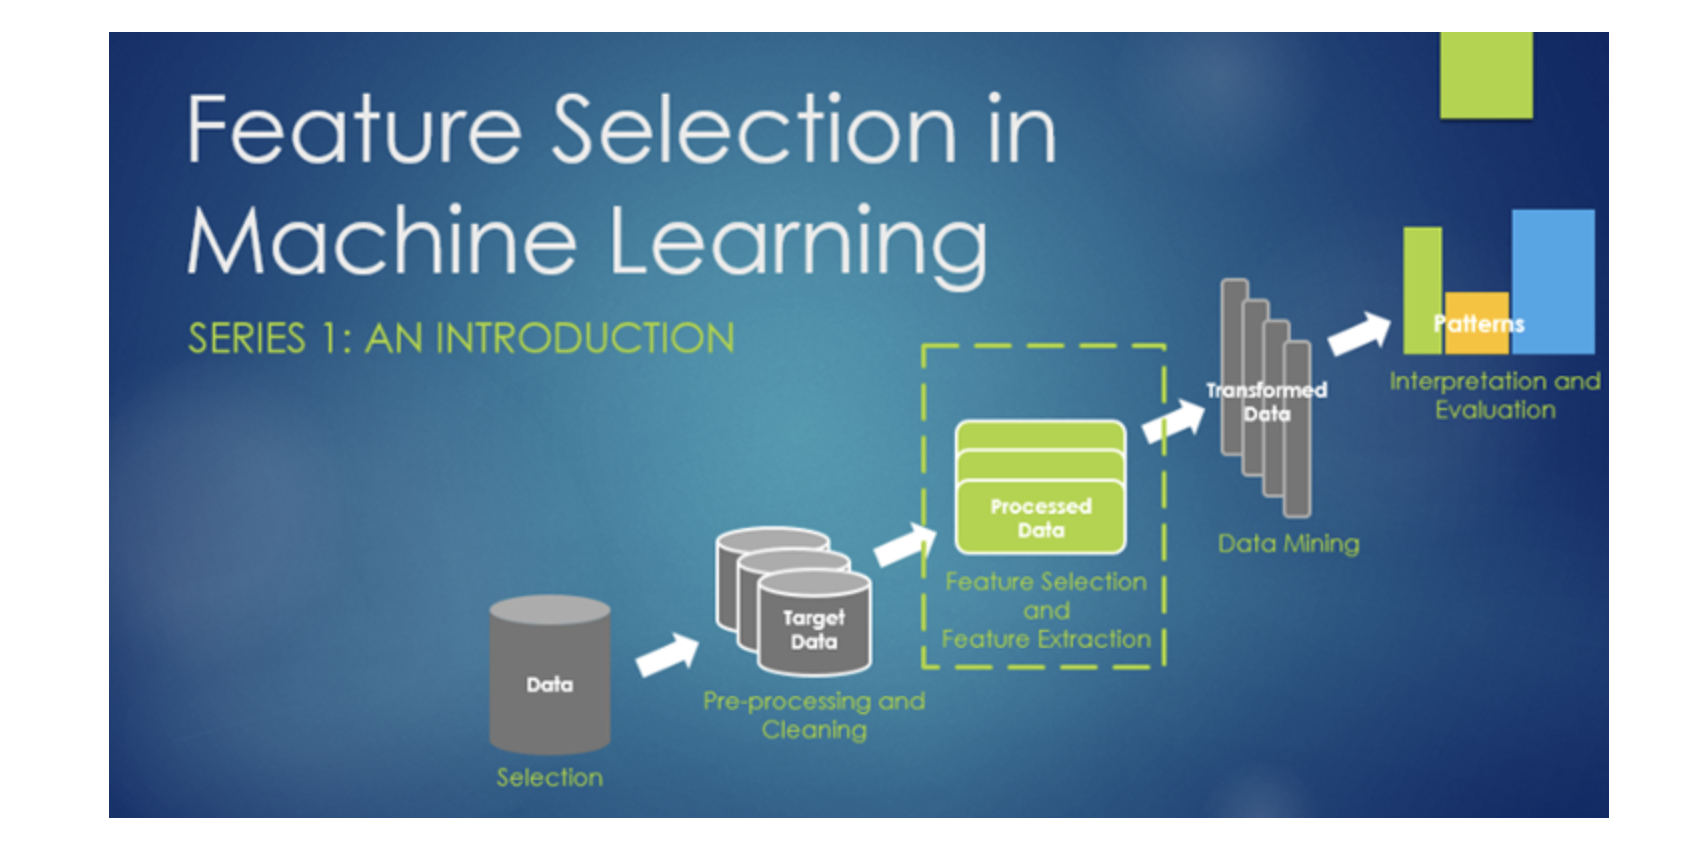

- 特征选择是一个过程，您可以自动选择数据中您感兴趣的对预测变量或输出贡献(影响)最大的特征。

- 解决：机器学习经常面临过拟合的问题。


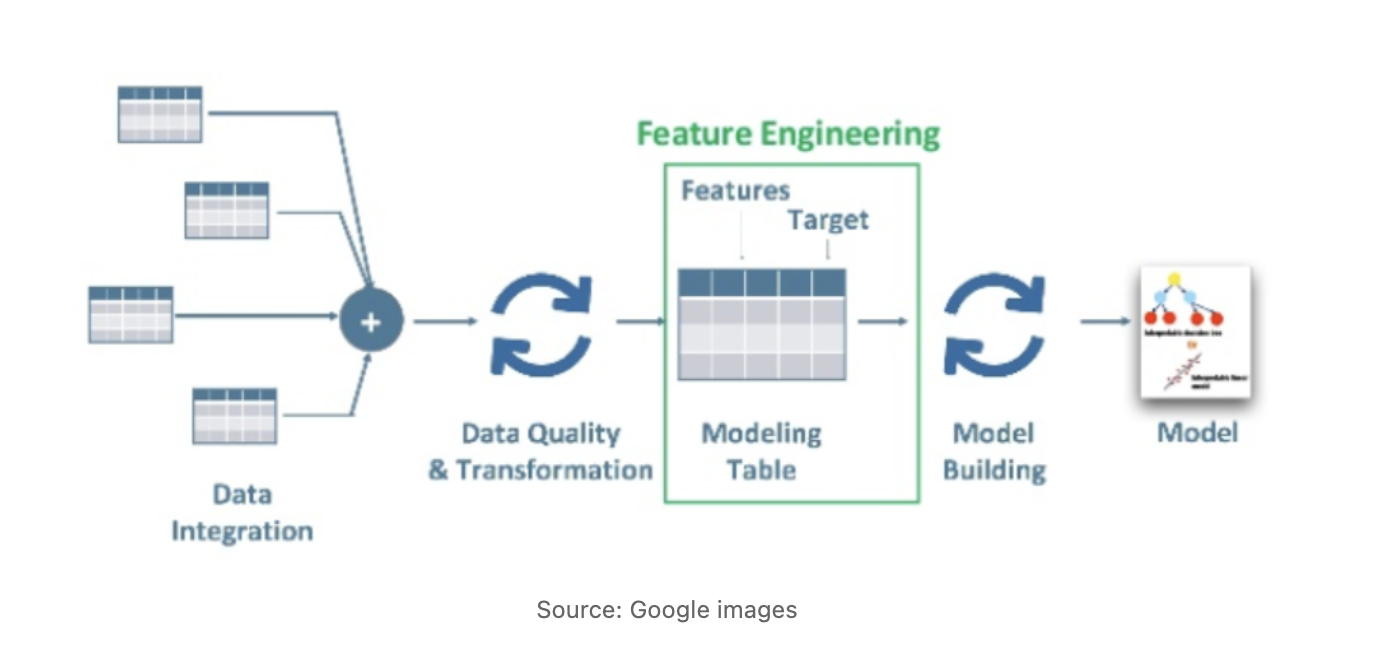

- SibSp	同行的兄弟姐妹或配偶数量	整数
- Parch	同行的父母或子女数量	整数

In [26]:
df_manipulated = df_cleaned.copy()

# Create 'FamilySize'
df_manipulated['FamilySize'] = df_manipulated['SibSp'] + df_manipulated['Parch'] + 1
print("\nDataFrame with 'FamilySize' column:")
display(df_manipulated[['SibSp', 'Parch', 'FamilySize']].head())


DataFrame with 'FamilySize' column:


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


- Fare	船票价格	数值型

In [27]:
# Create 'FarePerPerson' (handle cases where FamilySize is 0 to avoid division by zero)
df_manipulated['FarePerPerson'] = df_manipulated['Fare'] / df_manipulated['FamilySize']
# Handle potential division by zero or infinite values
df_manipulated['FarePerPerson'] = df_manipulated['FarePerPerson'].replace([float('inf'), -float('inf')], 0)
df_manipulated['FarePerPerson'].fillna(0, inplace=True)

/tmp/ipython-input-3327048520.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_manipulated['FarePerPerson'].fillna(0, inplace=True)


In [28]:
print("\nDataFrame with 'FarePerPerson' column:")
display(df_manipulated[['Fare', 'FamilySize', 'FarePerPerson']].head())


DataFrame with 'FarePerPerson' column:


,Fare,FamilySize,FarePerPerson
0,7.2500,2,3.62500
1,71.2833,2,35.64165
2,7.9250,1,7.92500
3,53.1000,2,26.55000
4,8.0500,1,8.05000


- Filter cols: 30 cols -> 10 cols
- Calculation: cols -> new cols

### 分箱连续数据

我们可以将“Age”等连续变量分类到箱中（例如，“Child”、“Young Adult”、“Adult”、“Senior”）。

In [29]:
# Define age bins and labels
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

df_manipulated['AgeGroup'] = pd.cut(df_manipulated['Age'], bins=age_bins, labels=age_labels, right=False)

In [30]:
print("\nDataFrame with 'AgeGroup' column:")
display(df_manipulated[['Age', 'AgeGroup']].head())


DataFrame with 'AgeGroup' column:


,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult


In [31]:
df_manipulated[['Age', 'AgeGroup']]

,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult
...,...,...
886,27.0,Young Adult
887,19.0,Young Adult
888,NaN,NaN
889,26.0,Young Adult


### 使用条件过滤行

我们可以根据特定条件选择行。让我们过滤出幸存的乘客。

In [32]:
survived_passengers = df_manipulated[df_manipulated['Survived'] == 1]
print(f"\nNumber of survived passengers: {len(survived_passengers)}")
display(survived_passengers.head())


Number of survived passengers: 342


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000,Adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,3,3.71110,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,15.03540,Teenager


### 分组和聚合 (`groupby`)

`groupby()` 用于根据一列或多列对行进行分组，然后对这些组应用聚合函数（如均值、总和、计数）。让我们按乘客舱位（'Pclass'）查找乘客的平均年龄。

In [34]:
average_age_by_pclass = df_manipulated.groupby('Pclass')['Age'].mean()
print("\nAverage age by Pclass:")
display(average_age_by_pclass)


Average age by Pclass:


,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [36]:
# Group by multiple columns and aggregate multiple columns
survival_rate_by_sex_pclass = df_manipulated.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
print("\nSurvival rate by Sex and Pclass:")
display(survival_rate_by_sex_pclass)


Survival rate by Sex and Pclass:


,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


### 排序、重命名列

我们可以按一列或多列对 DataFrame 进行排序，并重命名列以提高清晰度。

In [37]:
# Sort by Fare in descending order
df_sorted_fare = df_manipulated.sort_values(by='Fare', ascending=False)
print("\nDataFrame sorted by Fare (descending):")
display(df_sorted_fare.head())


DataFrame sorted by Fare (descending):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2,256.164600,Adult
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.329200,Adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.329200,Adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,6,43.833333,Young Adult
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S,6,43.833333,Senior


In [38]:
df_sorted_fare.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,1,0.0,Adult
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,S,1,0.0,NaN
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S,1,0.0,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S,1,0.0,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,1,0.0,Adult


In [39]:
# Rename the 'Survived' column
df_renamed = df_manipulated.rename(columns={'Survived': 'IsSurvived'})
print("\nDataFrame with 'Survived' column renamed to 'IsSurvived':")
display(df_renamed.head())


DataFrame with 'Survived' column renamed to 'IsSurvived':


,PassengerId,IsSurvived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000,Adult


### 删除和重新排列列

我们已经看过删除列。让我们重新排列列，将“Survived”放在开头。

In [40]:
# List of columns
cols = df_manipulated.columns.tolist()
# Move 'Survived' to the beginning
cols.insert(0, cols.pop(cols.index('Survived')))
df_rearranged = df_manipulated[cols]
print("\nDataFrame with 'Survived' column at the beginning:")
display(df_rearranged.head())


DataFrame with 'Survived' column at the beginning:


,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,FarePerPerson,AgeGroup
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500,Young Adult
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165,Adult
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500,Young Adult
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000,Adult
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000,Adult


## 🧮 第三部分：编码分类变量

机器学习模型通常需要数值输入。分类变量需要通过编码转换为数值格式。

### 使用 `pd.get_dummies` 进行独热编码

独热编码为列中的每个唯一类别创建新的二进制列。它适用于名义分类变量，其中没有固有的顺序。让我们对“Sex”和“Embarked”进行编码。

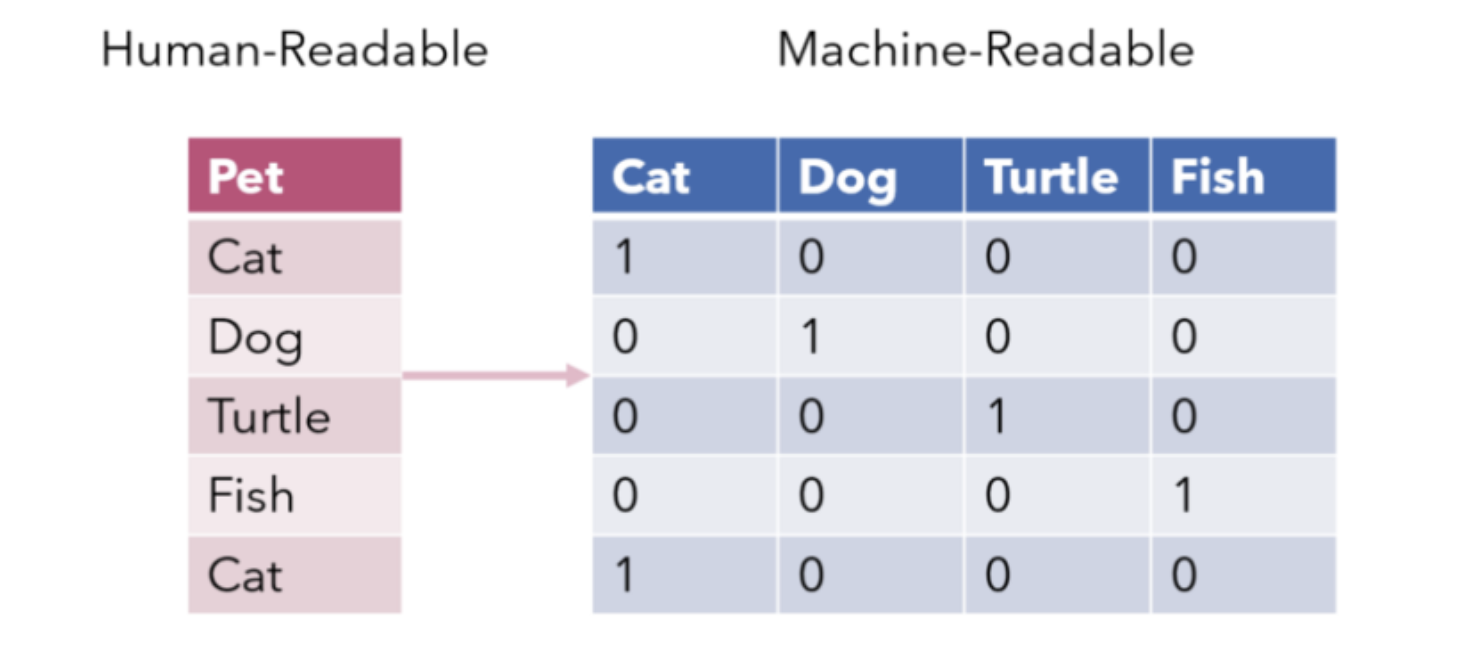

- Embarked	登船港口（C = Cherbourg, Q = Queenstown, S = Southampton）	分类变量

In [41]:
df_encoded = df_manipulated.copy()

# One-hot encode 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'Embarked'], drop_first=True)
print("\nDataFrame after One-Hot Encoding 'Sex' and 'Embarked':")
display(df_encoded.head())


DataFrame after One-Hot Encoding 'Sex' and 'Embarked':


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,FarePerPerson,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,3.62500,Young Adult,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,35.64165,Adult,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,7.92500,Young Adult,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,26.55000,Adult,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,8.05000,Adult,True,False,True


### 二进制列的标签编码

对于二进制分类列（只有两个唯一值），标签编码就足够了，将类别分配为 0 和 1。虽然使用 `pd.get_dummies` 并设置 `drop_first=True` 对二进制列也能达到类似效果，但让我们概念性地演示如何使用映射进行标签编码。

In [42]:
# Let's create a binary column from 'AgeGroup' for demonstration (e.g., 'IsChild')
df_encoded['IsChild'] = (df_encoded['AgeGroup'] == 'Child').astype(int)
print("\nDataFrame with 'IsChild' (Label Encoded):")
display(df_encoded[['AgeGroup', 'IsChild']].head())


DataFrame with 'IsChild' (Label Encoded):


,AgeGroup,IsChild
0,Young Adult,0
1,Adult,0
2,Young Adult,0
3,Adult,0
4,Adult,0


In [43]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,FarePerPerson,AgeGroup,Sex_male,Embarked_Q,Embarked_S,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,3.62500,Young Adult,True,False,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,35.64165,Adult,False,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,7.92500,Young Adult,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,26.55000,Adult,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,8.05000,Adult,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,13.00000,Young Adult,True,False,True,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,30.00000,Young Adult,False,False,True,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,4,5.86250,NaN,False,False,True,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,30.00000,Young Adult,True,False,False,0


## 📌 第四部分：学生练习

现在轮到你练习了！使用 `df_manipulated` DataFrame（清洗和基本处理后，但未编码之前的数据）完成以下练习。

**练习 1：** 删除“Embarked”列中包含缺失值的行。检查删除前后“Embarked”列中缺失值的数量。

In [ ]:
# Your code for Exercise 1 here


**练习 2：** 创建一个名为“IsAlone”的新列，如果“FamilySize”为 1（表示乘客独自一人），则该列为 1，否则为 0。

In [ ]:
# Your code for Exercise 2 here


**练习 3：** 计算每个“AgeGroup”的平均“Fare”。

In [ ]:
# Your code for Exercise 3 here

**练习 4：** 找出每个“Pclass”中幸存的乘客人数。

In [ ]:
# Your code for Exercise 4 here


**练习 5：** 按“Age”升序排序 DataFrame，然后按“Fare”降序排序。显示前 10 行。

In [ ]:
# Your code for Exercise 5 here


## 📊 第五部分：可视化（预览）

数据可视化是理解数据清洗和处理结果的有力方法。让我们创建几个简单的图来查看按“Sex”和“AgeGroup”划分的生存率。我们将使用 `df_manipulated` DataFrame 进行此操作。

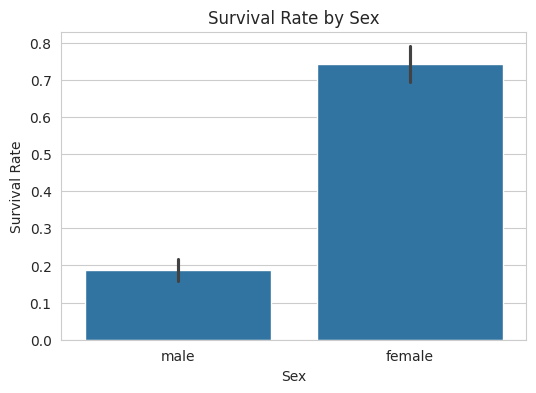

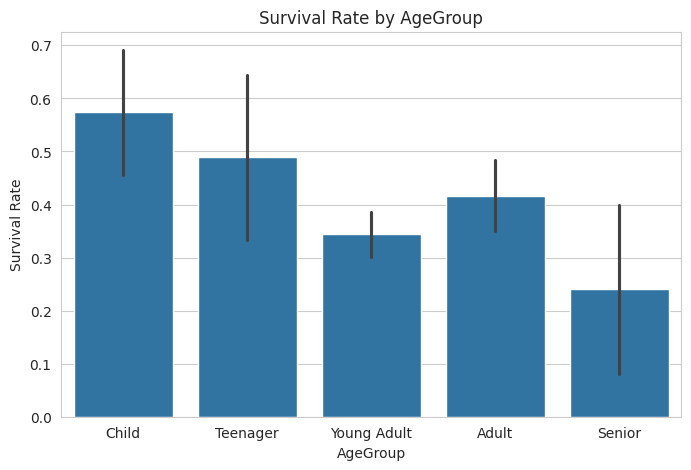

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')

# Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df_manipulated)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by AgeGroup
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df_manipulated)
plt.title('Survival Rate by AgeGroup')
plt.ylabel('Survival Rate')
plt.show()

## ✅ 结论

在本 Notebook 中，我们介绍了使用 pandas 库进行基本数据清洗和处理的技术：

* 使用 `.info()` 和 `.describe()` 检查数据。
* 检测和处理缺失值和重复项。
* 标准化分类数据。
* 创建新特征。
* 对连续数据进行分箱。
* 过滤、分组、排序和重命名数据。
* 使用独热编码对分类变量进行编码。

这些技能是任何数据科学项目的基础。接下来的步骤通常涉及更高级的特征工程、选择相关特征以及构建机器学习模型。继续使用不同的数据集进行练习，以巩固你的理解！


### 处理重复项

重复的行会扭曲分析。我们可以识别并删除它们。

### 标准化分类值和解决不一致的格式

有时，分类值可能在大小写或拼写上有差异（例如，“male”和“Male”）。我们可以标准化这些。在此数据集中，“Sex”已经一致，但让我们看看如果它不一致，我们将如何处理它。